## Attention Is All You Need

Paper: https://arxiv.org/abs/1706.03762

Blog: https://research.googleblog.com/2017/08/transformer-novel-neural-network.html


In [1]:
from IPython.display import Image, HTML, display

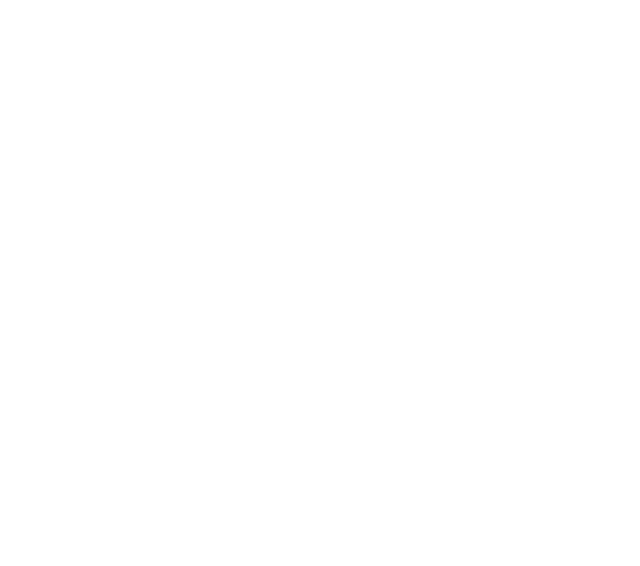

In [3]:
Image("https://3.bp.blogspot.com/-aZ3zvPiCoXM/WaiKQO7KRnI/AAAAAAAAB_8/7a1CYjp40nUg4lKpW7covGZJQAySxlg8QCLcBGAs/s640/transform20fps.gif",format='png')

In this paper, they have taken the similar concept of Attention for an Encoder-Decoder architecture, while totally moving away from traditional RNN based encoding and decoding.

The novel idea is to use a model termed as **Transformer**, which has stacked self-attention and point-wise fully connected layers.

- Encoder
    - 6 identical layers, where each later has two sublayers
        a. Multi-head self-attention mechanism
        b. position wise fully connected network
    - Residual connection around each of the two sublayers, followed by layer normalization (to ensure that the layers remain in reasonable range)
    
- Decoder
    - Similar architecture, but with an added layer which performs multi-head attention over the output of the encoder stack
    
In short, the paper uses the following attention tricks:

- Self Attention: Each layer combines words with others
- Multi-headed attention: 8 attention heads learned independently
- Normalized Dot-product Attention: Remove bias in dot product when using large networks
- Positional Encodings: Even if we don't have RNN, we can distinguish positions
    

#### Scaled Dot Product Attention

- Attention(Query, Key, Value) = output
    - Output = weighted sum of values.
    - Weight associated with each value = compatibility function of the query with the corresponding key

where,

- Query : decoder state _projection_
- Key, Value pair vectors : all encoder state _projection_

Given a key $k$ and query $q$, we have seen sevaral types of attention mechanisms in the past:

- Multi-layer Perceptron (Bahdanau et al) : $a(q,k) = w_2^{\top} tanh(W_1[q:,k])$
- Bilinear (Luong et al, 2015) : $a(q,k) = q^{\top}Wk$
- Dot Product Attention (Luong et.al 2015) = $a(q,k) = q^{\top}k$

Problem with dot product attention is the scale of dot product increases as dimensions get larger. So, the authors fixed it with a scale:

$$ a(q,k) = \frac{q^{\top}k}{\sqrt(|k|)} $$

Value vectors are also encoder state, which used in Scaled Dot Product Attention is calculating:

$$ Attention(Q,K,V) = softmax(\frac{QK^{\top}}{\sqrt(d_m)})V$$

where,

- $d_m$: model dimension

#### Multi Head Attention

Similar to the concept in Lin et al, instead of calculating attention in single attention, the authors calculated in $h$ hops (`nheads`) with different key value and output values. Those are concatenated to get the final matrix.

$$ MultiHead(Q,K,V) = Concat(head_1,... head_h)W^0 $$

where, $head_i = Attention(QW_i^Q, KW_i^K, VW_i^V)$

Some points:

- I mention projection not the entire encoder/decoder state. In the [codebase](https://github.com/jadore801120/attention-is-all-you-need-pytorch/blob/master/transformer/SubLayers.py#L53-L56) it seems they converted the original encoder state of $d_m$ dimension into smaller $d_k$ and $d_v$ dimensions for K,Q and V. Probably for computation feasibility / less number of parameters. After multihead attention, the number of hops (`nheads`) multiplied by $d_k$ recovers $d_m$. So, $d_k$ must always be $\frac{d_m}{nheads}$

#### Positionwise feedforward networks

In addition to multi-head attention, the Encoder/Decoder also contains a "_fully
connected feed-forward network, which is applied to each position separately and identically, which consists of two linear transformations and a ReLU activation_". This boils down to two 1D convolutions with kernel size = 1.

$$FFN(x) = max(0, xW_1 + b_1)W_2 + b_2$$

#### Positional Encodings

Since the model contains no recurrence or convolutions, in order for the model to make use of the sequence, some information about the relative or absolute position needs to be injected. They calculate the encoding using sine and cosine functions.

$$PE(pos,2i) = sin(pos/10000^{2i/d_model})$$

$$PE(pos,2i+1) = cos(pos/10000^{2i/d_model})$$

where, $d_m$ is the dimension of the encoding.

This positional encoding can also be alternatively learned by backprop.

#### Applications of attention

- $Q$ from previous decoder layer, $K$ and $V$ from output of encoder = allows every position in decoder to attend over all positions of input sequence
- Each position in encoder can attend to all positions in previous layer of encoder using self attention
- Self-attention in decoder allows it to attend to all positions in decoder up to and including that position

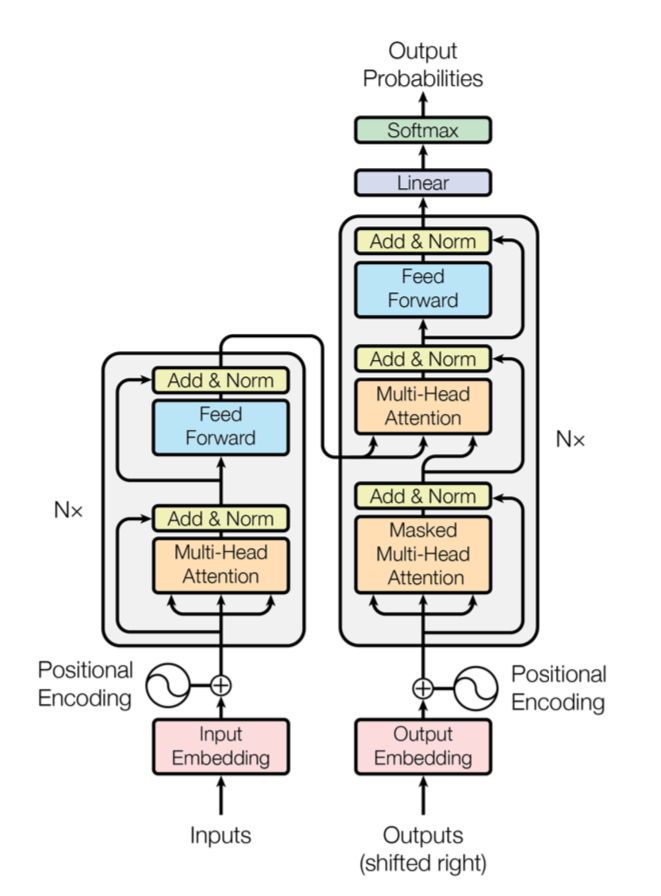

In [7]:
Image("images/transformer_model.png")

#### Benefits of Using Self Attention

- Less computation complexity
    - Faster than recurrent layers when the sequence length $n$ is smaller than representation dimensionality $d$
- Parallelizable computation
- Learning long range dependencies
- More interpretable models

## References

- "Attention is All you need" explanation material heavily borrowed from http://phontron.com/class/nn4nlp2017/assets/slides/nn4nlp-09-attention.pdf